In [322]:
import pandas as pd # Manejo de datos tabulados
import numpy as np # Algebra Lineal y operaciones matematicas
import matplotlib.pyplot as plt # Graficos de datos
import pandas_profiling as ppr # ?????????
from pandas_profiling import ProfileReport
import plotly as pl
import cufflinks as cf 

In [323]:
from IPython.display import display,HTML

cf.set_config_file(sharing= 'public', theme= 'ggplot', offline= True)
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [324]:
%matplotlib inline

## 1. Cargando los Datos de los Niños del Centro de Salud
Estos datos no estan procesados aun.

In [325]:
dfn1 = pd.read_csv('../data/Niños LIMA DIRIS CENTRO.csv')
dfn2 = pd.read_csv('../data/Niños LIMA DIRIS ESTE.csv')
dfn3 = pd.read_csv('../data/Niños LIMA DIRIS NORTE.csv')
dfn4 = pd.read_csv('../data/Niños LIMA DIRIS SUR.csv')
dfn5 = pd.read_csv('../data/Niños LIMA.csv')

In [326]:
dfn_todos = pd.concat([dfn1, dfn2,dfn3,dfn4, dfn5])
dfn_todos.columns

Index(['Diresa', 'Red', 'Microred', 'EESS', 'Dpto_EESS', 'Prov_EESS',
       'Dist_EESS', 'Renipress', 'FechaAtencion', 'Sexo', 'FechaNacimiento',
       'EdadMeses', 'UbigeoPN', 'DepartamentoPN', 'ProvinciaPN', 'DistritoPN',
       'CentroPobladoPN', 'Juntos', 'SIS', 'Pin', 'Qaliwarma', 'Peso', 'Talla',
       'Hemoglobina', 'FechaHemoglobina', 'Cred', 'Suplementacion',
       'Consejeria', 'Sesion', 'UbigeoREN', 'DepartamentoREN', 'ProvinciaREN',
       'DistritoREN', 'AlturaREN', 'HBC', 'Dx_Anemia'],
      dtype='object')

In [327]:
dfnt= dfn_todos.assign(Cantidad_Niños=1)
dfnt= dfnt[['Diresa','UbigeoPN','Prov_EESS','Dist_EESS', 'EdadMeses','Sexo','Peso', 'Talla','Hemoglobina','Dx_Anemia','Cantidad_Niños']]
dfntgx = dfnt

In [328]:
dfnt= dfnt.dropna()
dfnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138369 entries, 0 to 21169
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Diresa          138369 non-null  object 
 1   UbigeoPN        138369 non-null  object 
 2   Prov_EESS       138369 non-null  object 
 3   Dist_EESS       138369 non-null  object 
 4   EdadMeses       138369 non-null  int64  
 5   Sexo            138369 non-null  object 
 6   Peso            138369 non-null  object 
 7   Talla           138369 non-null  object 
 8   Hemoglobina     138369 non-null  float64
 9   Dx_Anemia       138369 non-null  object 
 10  Cantidad_Niños  138369 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


## DATAFRAME DE NIÑOS CON/SIN ANEMIA

In [329]:
dfnt.Dx_Anemia.unique()

array(['Normal', 'Anemia Leve', 'Anemia Moderada', 'Anemia Severa'],
      dtype=object)

In [330]:
dfntn = dfnt[dfnt['Dx_Anemia']== 'Normal']               # El dataframe de ninos sanos
dfntn1 = dfnt[dfnt['Dx_Anemia']== 'Anemia Leve']         # El Dataframe con anemia leve
dfntn2 = dfnt[dfnt['Dx_Anemia']== 'Anemia Moderada']     # El Dataframe con anemia Moderada
dfntn3 = dfnt[dfnt['Dx_Anemia']== 'Anemia Severa']       # El Dataframe con anemia severa

ninos_con_Anemia = pd.concat([dfntn1,dfntn2,dfntn3])
ninos_sin_Anemia = dfntn.copy()


In [331]:
ddf4= ninos_con_Anemia.groupby('Sexo')['Cantidad_Niños'].count()
ddf4

Sexo
F    15935
M    18649
Name: Cantidad_Niños, dtype: int64

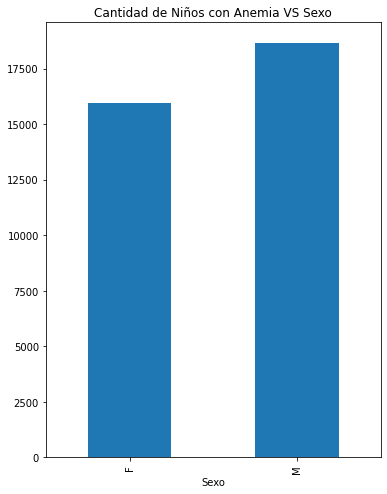

In [332]:
ddf4.plot(kind = "bar",figsize=(6,8), title="Cantidad de Niños con Anemia VS Sexo")
plt.show()

In [333]:
ddf1= dfnt.groupby('Dx_Anemia')['Cantidad_Niños'].count()
fd= pd.DataFrame(ddf1)
fd= fd.reset_index()
fd

,Dx_Anemia,Cantidad_Niños
0,Anemia Leve,25143
1,Anemia Moderada,9351
2,Anemia Severa,90
3,Normal,103785


In [334]:
# plotting
fd.iplot(kind='pie', labels='Dx_Anemia',
                         values='Cantidad_Niños',
                         title='GRAFICO INTERACTIVO DE NIÑOS CON/SIN ANEMIA (%)')

# Grafica Interactivo de Niños con Anemia por Provincia

In [335]:
ddf5= ninos_con_Anemia.groupby('Prov_EESS')['Cantidad_Niños'].count()
ddf5= ddf5.reset_index()

In [336]:
# plotting
ddf5.iplot(kind='pie', labels='Prov_EESS',
                         values='Cantidad_Niños',
                         title='CANTIDAD DE NIÑOS CON ANEMIA POR PROVINCIA DE LIMA (%)')

 ## Convertiendo la Edad en Rango de Edad

In [337]:
dfnt['EdadMeses'].describe()

count    138369.000000
mean         22.629693
std          14.078767
min           6.000000
25%          12.000000
50%          19.000000
75%          30.000000
max          60.000000
Name: EdadMeses, dtype: float64

In [338]:
counts, bins = np.histogram(dfnt['EdadMeses'].dropna().values, bins=7)
bins

array([ 6.        , 13.71428571, 21.42857143, 29.14285714, 36.85714286,
       44.57142857, 52.28571429, 60.        ])

In [339]:
rangos_edad = [6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61]
edad_bins = pd.cut(dfnt['EdadMeses'], bins=rangos_edad)

edad_bins_count = edad_bins.value_counts()

In [340]:
RangoEdad= pd.DataFrame(edad_bins_count)
RangoEdad

,EdadMeses
"(6, 11]",24974
"(11, 16]",24531
"(16, 21]",20208
"(21, 26]",16273
"(26, 31]",10860
"(31, 36]",8263
"(46, 51]",6453
"(36, 41]",5940
"(41, 46]",4744
"(51, 56]",4709


<AxesSubplot:title={'center':'Cantidad de Niños por Rango de Edad'}>

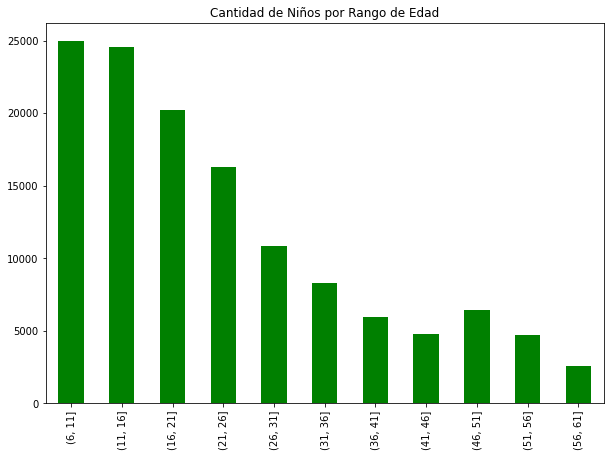

In [341]:
edad_bins_count.sort_index().plot(kind='bar', figsize=(10,7),title="Cantidad de Niños por Rango de Edad", color='green')

## Analisis Exploratorio de Datos (EDA)

es el proceso de limpieza y descubrimiento de *insights* a través de la revisión detallada de un conjunto de datos.

### Pasos de preparación

1. Seleccionar las variables de explorar
1. Verificar la integridad de las variables (si están limpias o qué debemos hacer para limpiarlas o si no se pueden usar)
1. Plantear las preguntas de evaluacion
1. Plantear hipotesis a partir de nuestras variables*

### Pasos de EDA 

1. Limpiar los datos (70% del tiempo)
1. Responder las preguntas de exploración a partir de los datos (indicadores y gráficas)
1. Responder las hipótesis (Tests estadísticos | estadística descriptiva)*
1. Generar un reporte Tecnico para el público en general 

> *Pasos opcionales dependiendo de la experiencia en el area de analisis

In [342]:
dfntgx = dfnt.copy()
dfntgx = dfntgx.drop(['Cantidad_Niños'], axis=1)
profile = ppr.ProfileReport(dfntgx, title='Reporte Niños con Anemia', minimal=True)

In [343]:
profile.to_file('../data/reports/Database_niños_Dx_Anemia.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 262.78it/s]


In [357]:
dfntgx.to_csv('../data/reports/Base_de_datos_Niños_Con_Anemia.csv')

### Preguntas de exploración

1. ¿Cuál es la probabilidad de que una niña tenga anemia en el Departamento de Lima?
1. ¿Cuál es el distrito en donde los niños padecen mas de anemia?
1. ¿Cuál es el rango de edad en que los niños(a) padecen de anemia?


##### Preguntas numero 1
1. La probabilidad de que una niña tenga anemia es 0.1151 y expresado en (%) seria 11.51%

In [344]:
# Desarrollo de Pregunta 1
niños_totales = dfnt['Cantidad_Niños'].count()
niños_totales

138369

In [345]:
preg_1 = ninos_con_Anemia.groupby('Sexo')['Cantidad_Niños'].count()
pd.DataFrame(preg_1)

,Cantidad_Niños
Sexo,
F,15935
M,18649


In [346]:
# Hallando la Probabilidad de que una niña tenga Anemia en el departamento de Lima
numero_niñas = 15935
niños_totales = 138369 
print(numero_niñas/niños_totales)  # 

0.11516307843519863


In [347]:
print(numero_niñas/niños_totales*100, "%") ## La probabilidad expresada en porcentaje

11.516307843519863 %


##### Preguntas numero 2
1. El distrito que se encuentran mayor numero de niños con anemia es SAN JUAN DE LURIGANCHO con 3357 casos presentados

In [348]:
ninos_Distrito = ninos_con_Anemia.groupby('Dist_EESS')['Cantidad_Niños'].count()
ninos_Distrito = pd.DataFrame(ninos_Distrito)
sf = ninos_Distrito.max() 
sf

Cantidad_Niños    3357
dtype: int64

In [349]:
ninos_Distrito_max = pd.DataFrame(ninos_Distrito).reset_index()
grafico2 = ninos_Distrito_max[ninos_Distrito_max['Cantidad_Niños']== 3357 ]
grafico2

,Dist_EESS,Cantidad_Niños
107,SAN JUAN DE LURIGANCHO,3357


##### Preguntas numero 3
1. El rango de edad donde los niños padecen mas frecuente de anemia son: Primeramente [6,11] con 9443, en Segundo Lugar <11,16] con 8612 
y en Tercer Lugar  <16,21] con 5332

In [350]:
ninos_con_Anemia['EdadMeses'].describe()

count    34584.000000
mean        17.794529
std         11.234692
min          6.000000
25%         10.000000
50%         14.000000
75%         22.000000
max         60.000000
Name: EdadMeses, dtype: float64

In [351]:
counts, bins = np.histogram(ninos_con_Anemia['EdadMeses'].dropna().values, bins=7)
bins

array([ 6.        , 13.71428571, 21.42857143, 29.14285714, 36.85714286,
       44.57142857, 52.28571429, 60.        ])

In [352]:
rangos_edad1 = [6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61]
edad_bins1 = pd.cut(ninos_con_Anemia['EdadMeses'], bins=rangos_edad1)

edad_bins_count1 = edad_bins1.value_counts()

In [353]:
RangoEdad1= pd.DataFrame(edad_bins_count1)
RangoEdad1

,EdadMeses
"(6, 11]",9443
"(11, 16]",8612
"(16, 21]",5332
"(21, 26]",3277
"(26, 31]",1809
"(31, 36]",1202
"(36, 41]",836
"(41, 46]",631
"(46, 51]",617
"(51, 56]",447


In [354]:
RangoEdad1_max = pd.DataFrame(RangoEdad1).reset_index()
grafico3 = RangoEdad1_max[RangoEdad1_max['EdadMeses'].isin([9443,8612,5332]) ]
grafico3

,index,EdadMeses
0,"(6, 11]",9443
1,"(11, 16]",8612
2,"(16, 21]",5332


<AxesSubplot:title={'center':'CANTIDAD DE NIÑOS POR RANGO DE EDAD'}>

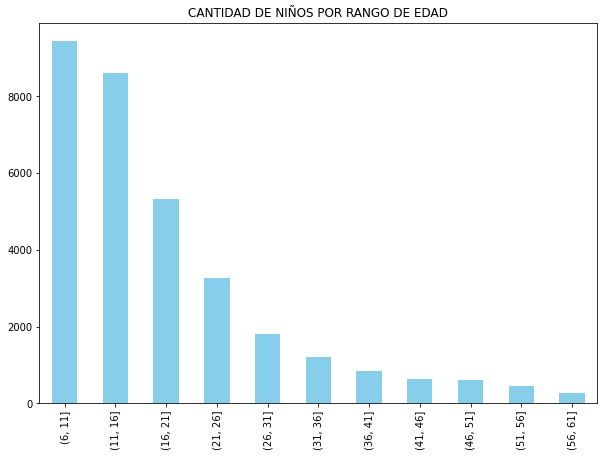

In [355]:
edad_bins_count1.sort_index().plot(kind='bar', figsize=(10,7),title="CANTIDAD DE NIÑOS POR RANGO DE EDAD", color='skyblue')